# Project- City_Temperature

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("CityTemps_1jkv0l (3).csv")

In [61]:
df.head()

,Year,Month,Moscow,Melbourne,San Francisco
0,2014,1,-8.6,22.0,12.8
1,2014,2,-1.9,21.5,12.7
2,2014,3,2.8,19.5,15.0
3,2014,4,7.0,15.8,15.7
4,2014,5,16.0,13.9,17.5


In [63]:
df.tail()

,Year,Month,Moscow,Melbourne,San Francisco
19,2015,8,17.6,9.8,20.0
20,2015,9,13.8,12.1,19.5
21,2015,10,4.4,18.1,18.7
22,2015,11,0.8,17.4,12.4
23,2015,12,0.2,21.3,10.3


In [65]:
df.isnull().sum()

Year             0
Month            0
Moscow           0
Melbourne        0
San Francisco    0
dtype: int64

In [67]:
df.describe()

,Year,Month,Moscow,Melbourne,San Francisco
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2014.500000,6.500000,7.133333,15.525000,16.241667
std,0.510754,3.526299,9.008965,4.352835,2.984586
min,2014.000000,1.000000,-8.600000,8.900000,10.300000
25%,2014.000000,3.750000,-0.175000,11.900000,14.475000
50%,2014.500000,6.500000,5.250000,15.700000,15.700000
75%,2015.000000,9.250000,16.025000,19.050000,19.325000
max,2015.000000,12.000000,21.100000,22.000000,20.400000


In [69]:
df.columns

Index(['Year', 'Month', 'Moscow', 'Melbourne', 'San Francisco'], dtype='object')

# Histogram of Temperatures (All Cities Combined)

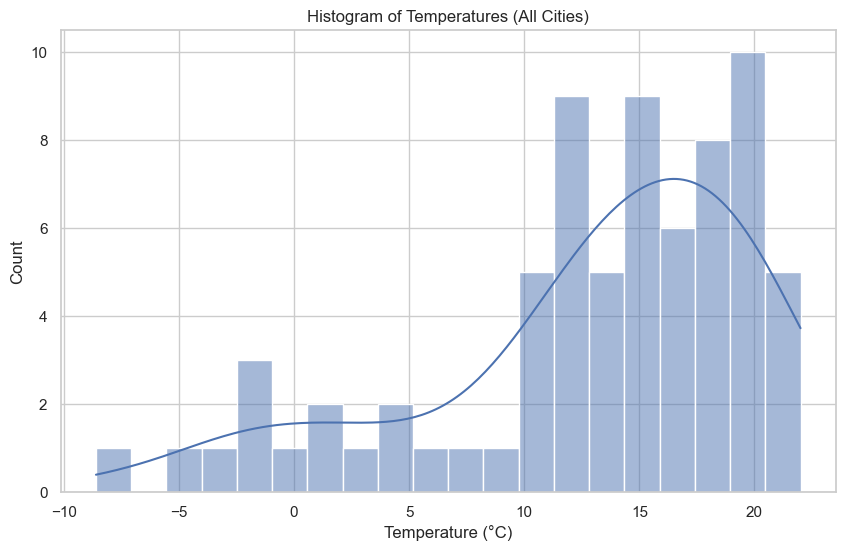

In [72]:
sns.set(style="whitegrid")
df_melted = df.melt(id_vars=['Year', 'Month'], var_name='City', value_name='Temperature')

plt.figure(figsize=(10, 6))
sns.histplot(df_melted['Temperature'], kde=True, bins=20)
plt.title('Histogram of Temperatures (All Cities)')
plt.xlabel('Temperature (°C)')
plt.show()

# Bar Plot - Average Temperature per City

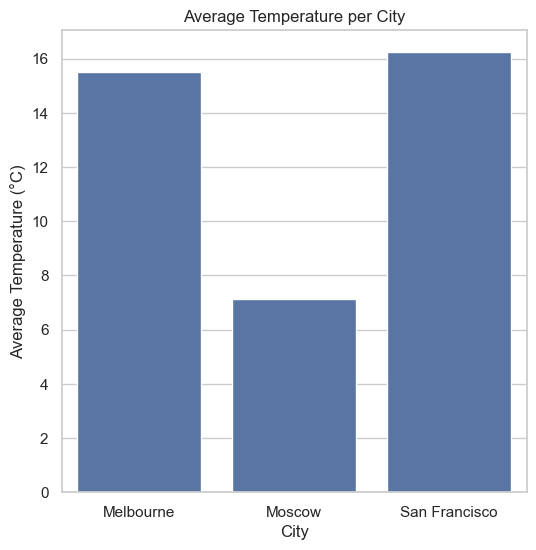

In [75]:
avg_temps = df_melted.groupby('City')['Temperature'].mean().reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(x='City', y='Temperature', data=avg_temps)
plt.title('Average Temperature per City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Line Plot (Monthly Trend per City)

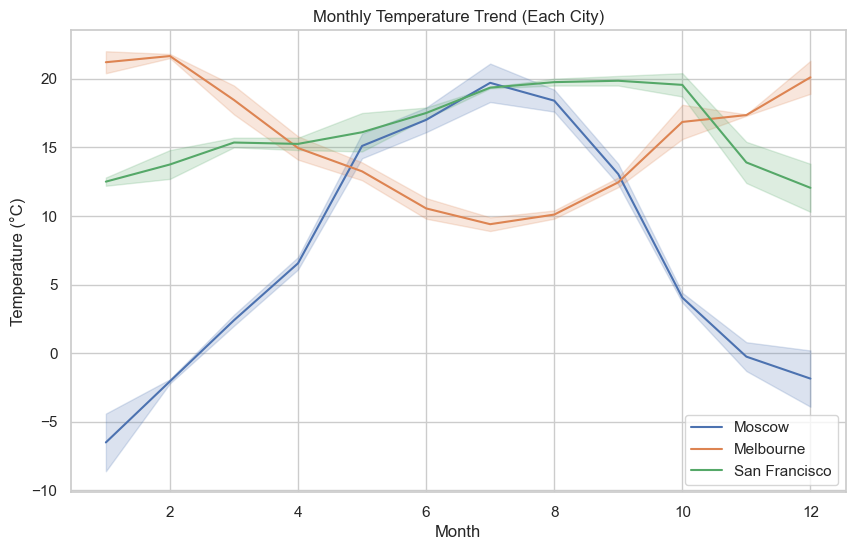

In [78]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Month', y='Moscow', label='Moscow')
sns.lineplot(data=df, x='Month', y='Melbourne', label='Melbourne')
sns.lineplot(data=df, x='Month', y='San Francisco', label='San Francisco')
plt.title('Monthly Temperature Trend (Each City)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Boxplot - Temperature Distribution per City

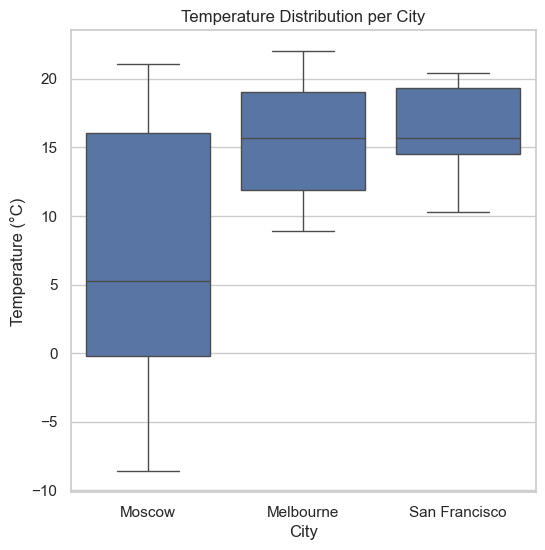

In [80]:
df_melted = df.melt(id_vars=['Year', 'Month'], var_name='City', value_name='Temperature')

plt.figure(figsize=(6, 6))
sns.boxplot(x='City', y='Temperature', data=df_melted)
plt.title('Temperature Distribution per City')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()

# Heat map

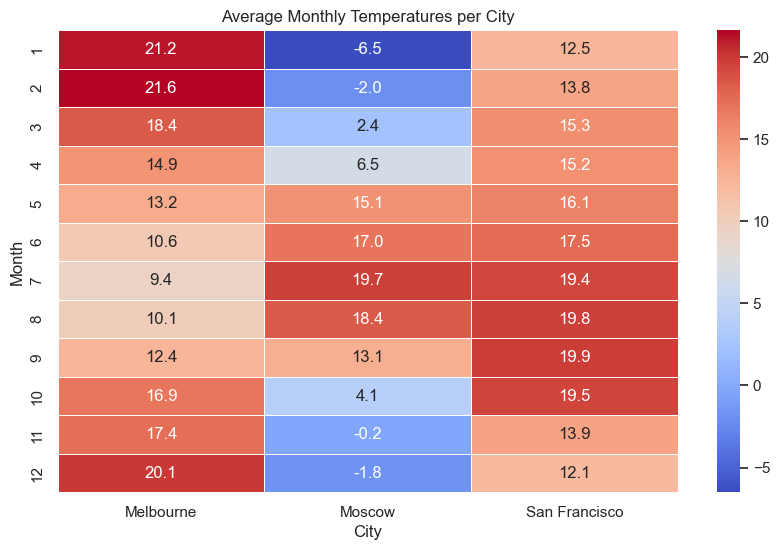

In [87]:
df_melted = df.melt(id_vars=['Year', 'Month'], var_name='City', value_name='Temperature')
pivot_table = df_melted.groupby(['Month', 'City'])['Temperature'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Monthly Temperatures per City')
plt.xlabel('City')
plt.ylabel('Month')
plt.show()